# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusion)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [86]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [87]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [88]:
# Total number of Rows in initial data frame (df) dataset
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [89]:
# Number of unique users in the dataset
df.user_id.nunique()

290584

**d.** The proportion of users converted.

In [90]:
# The proportion of users converted
df.converted.sum() / df.user_id.nunique()

0.12126269856564711

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [91]:
# Count of inaccurate rows for the treatment group
treatment_old = df.query("group == 'treatment' and landing_page == 'old_page'").shape[0]
treatment_old

1965

**f.** Do any of the rows have missing values?

In [92]:
# There are 0 missing values (false)
# df.isnull().any(axis = 1).sum() produces the value = 0
df.isnull().sum().any()

False

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [93]:
df2 = df.query("group == 'control' and landing_page == 'old_page'")
df2 = df2.append(df.query("group == 'treatment' and landing_page == 'new_page'"))

In [94]:
# Double Check all of the incorrect rows were removed from df2
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0] 

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [95]:
# Count of unique user id's in df2
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [96]:
# Repeated rows by user id
# 773192
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [97]:
# Duplicated rows by user id
# 773192
df2[df2.duplicated(['user_id','group','landing_page'], keep=False)].sort_values(by=['user_id','group','landing_page'])

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [98]:
# Remove one of the rows with a duplicate user_id..
df2 = df2.drop_duplicates(subset=['user_id'])
# Check again if the row with a duplicate user_id is deleted or not
df2.shape[0]

290584

### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>



In [99]:
# Overall conversion rate
converted_df2 = df2.converted.mean()
converted_df2

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [100]:
# Create dataframe with all control records
control_df2 = df2.query('group == "control"')

# Compute converted rate
control_cv = control_df2.query('converted == 1').user_id.nunique() / control_df2.user_id.nunique()

# Display converted rate
control_cv

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [101]:
# Create dataframe with all treatment records
treatment_df2 = df2.query('group == "treatment"')

# Compute converted rate
treatment_cv = treatment_df2.query('converted == 1').user_id.nunique() / control_df2.user_id.nunique()

# Display converted rate
treatment_cv

0.1188375070556328

In [102]:
# Calculate the actual observed differences (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_cv - control_cv

obs_diff

-0.0015487974448284009

**d.** What is the probability that an individual received the new page?

In [103]:
# Probability of individual receiving the new page
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

**Answer:** Based on the various metrics above, I do not think the new treatment group will lead to more conversions. The conversion rate of the old page is somewhat higher than the new page. The probability of the old page vs. the new page is split 50/50 (or 50%).

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

**Answer:**

$$H_0: p_{old} = p_{new} $$

$$H_1: p_{new} > p_{old} $$

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [104]:
# Conversion Rate for p(new) under Null
p_new = df2['converted'].sum() / df2.shape[0]

p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [105]:
# Conversion Rate for p(old) under Null
p_old = df2['converted'].sum() / df2.shape[0]

p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [106]:
# The number of individuals in the treatment group
n_new = df2.query('group =="treatment"' and 'landing_page == "new_page"').user_id.nunique()
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [107]:
# The number of individuals in the control group
n_old = df2.query('group =="control"' and 'landing_page == "old_page"').user_id.nunique()
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [108]:
# Sample for Treatment Group
new_page_converted = np.random.choice(df2.converted, n_new)

In [109]:
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [110]:
# Sample for Control Group
old_page_converted = np.random.choice(df2.converted, n_old)

In [111]:
old_page_converted

array([0, 1, 0, ..., 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [112]:
# Difference in converted probability from samples
p_new - p_old

0.0


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [113]:
# Sampling distribution with bootstrapping
p_diffs = []

new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old

p_diffs = new_page_converted - old_page_converted
p_diffs

array([ -1.07554414e-03,  -5.71479599e-05,   8.05450939e-05, ...,
         9.61376124e-04,   1.03038381e-03,   3.76464164e-04])

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


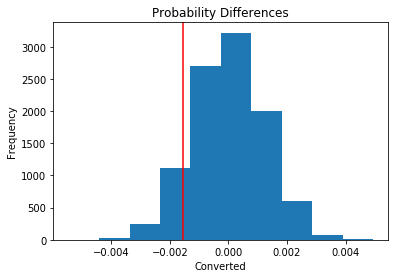

In [114]:
# Plot a histogram
plt.hist(p_diffs);

# Plot line for observed statistic
plt.axvline(obs_diff, c='red');

plt.title('Probability Differences')
plt.xlabel('Converted')
plt.ylabel('Frequency');

In [115]:
# Simulated distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

In [116]:
(null_vals > obs_diff).mean()

0.89700000000000002

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [117]:
# The proportion to the right of the plotted line are greater than actual observed differences.
# Compute p value
(p_diffs < obs_diff).mean()

0.1002

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

**Answer:**
The valve is called p-value. The p-value is above 0.05 p-value, so we don't have evidence to reject the null hypothesis.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [118]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query("landing_page == 'old_page'")['converted'].sum()
convert_old

# number of conversions with the new_page
convert_new = df2.query("landing_page == 'new_page'")['converted'].sum()
convert_new

# number of individuals who were shown the old_page
n_old = df2.query('group == "control"').shape[0]

# number of individuals who received new_page
n_new = df2.query('group == "treatment"').shape[0]

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. 

In other words, we determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. A "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.


Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---


In [119]:
# Z-score and p value using Stats Models
import statsmodels.api as sm

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


**Answer:**
Z-score means the difference between the test statistic, the difference between conversion rates, and the null hypothesis which is 1.31 std. dev. above the mean. This is less than the critical value for a one-tailed test of 1.645, which we would need to reject the null hypothesis. The z-test is in line with our findings.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**

This is Logistic Regression, because we are comparing two groups, based on conversion, which can be either 1 or 0.

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [35]:
# Add intercept
df2['intercept'] = 1
# Dummy Variable column
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

In [36]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [37]:
Logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = Logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Mar 2022   Pseudo R-squ.:               8.077e-06
Time:                        18:21:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


**Answer:**
The p-value assoicated with ab_page = 0.190. This p-value is close to the other value above, just a little higher. The regression model is trying to determine if a user converted or not. With the null hypothesis the ab_page is 1 and converted to 0. The alternative hypothesis is when the ab_page is 1 and converted to 1. The regression model differs from the other 2 test, based on it being a two-tailed test. It test if the page is 0 for old page and 1 for new, has a significnat effect on conversion rates. The other tests, are one-tailed, which look for significant effects in only one direction, does the page have a positive effect. 

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**
Based on the analysis, it doesn't seems that the treatment or control page has much of a difference if a user converts. I think it makes since to consider other factors to see if a user would convert. Just make sure you don't effect the current metrics in the regression model.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;
import matplotlib.pyplot as plt
%matplotlib inline

# Read the countries.csv
dfc = pd.read_csv("countries.csv")

In [40]:
# Merge (Join) the two dataframes together
df_merged = df2.set_index('user_id').join(dfc.set_index('user_id'))

In [41]:
# Create the necessary dummy variables for the merged dataframe
country_dummies = pd.get_dummies(df_merged['country'])
df2_new = df_merged.join(country_dummies)
df2_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1
719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1


In [42]:
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)

Logit_mod = sm.Logit(df2_new['converted'], df2_new[['intercept','ab_page','CA','UK']])
results = Logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 10 Mar 2022   Pseudo R-squ.:               2.323e-05
Time:                        18:21:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

**Answer:**
Looking at the p-values from this updated model, I don't think by adding the countries, that it effects the conversion. The p-values are also above the significance level of 0.05 (so statistically there is no evidence that the coefficients are greater the 0 (i.e. the null of each case)).

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

In [43]:
# Fit your model, and summarize the results
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)

df2_new['CA_Inter'] = df2_new['CA']*df2_new['ab_page']
df2_new['UK_Inter'] = df2_new['UK']*df2_new['ab_page']
df2_new['US_Inter'] = df2_new['US']*df2_new['ab_page']
lm = sm.Logit(df2_new['converted'], df2_new[['intercept','ab_page','US_Inter','CA_Inter']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 10 Mar 2022   Pseudo R-squ.:               3.351e-05
Time:                        18:21:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page        0.0074      0.018      0.410      0.682      -0.028       0.043
US_Inter      -0.0257      0.019     -1.363      0.173      -0.063       0.011
CA_Inter      -0.0901      0.040     -2.225      0.026      -0.169      -0.011
==============================================================================
"""

**Answer:**
Looking at the p-value above, one of the metrics appears to be statisically significant. The Interaction between CA and the ab_page. (CA: p=0.026 and the p < 0.05).

In [45]:
1/np.exp(-0.0752)

1.0780997492739288

So based on the interpretation of the exponential number for the CA_Inter (Canada) above of 1.08 and holding all other variables constant, we can say a user from Canada who receives the new page is about 1.08 times more likely to convert. This is small in regards to the statistical significance and isn't much on the practical significance side.  We don't have enough evidence to reject the null hypothesis regarding this A/B testing. This just proves that the new page doesn't make that much of a difference and we can continue to use the old one. Great Experiement!

<a id='conclusion'></a>
## Conclusion:

As part of the research all 3 different ways, simulating sample distribution, z-test, and logit model, plus additional features all were taken into account for confounding factors. This proved to generate Null Hypothesis in which the conversion proportion were all the same for the new and old pages. In all three cases, this was compared to the actual difference in the conversion proportion.

<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [120]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0